<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("house_prices_yaounde.csv")

In [3]:
df.head()

,bedrooms,bathrooms,parking,size_sqm,age,condition,year_built,renovation_year,location,floor_number,distance_to_city_center,proximity_to_schools,price
0,7.0,2.0,NaN,111.0,NaN,excellent,1985.0,1981.0,Bastos,3.0,4.714763,1.774572,30962.533609
1,4.0,3.0,0.0,271.0,40.0,good,1970.0,2011.0,Mvan,2.0,5.268401,3.664092,2733.858110
2,NaN,1.0,2.0,282.0,48.0,poor,2005.0,NaN,NaN,NaN,7.680354,2.696442,77878.500593
3,7.0,2.0,0.0,81.0,35.0,good,2018.0,NaN,Bastos,2.0,8.042010,NaN,44617.709958
4,3.0,NaN,0.0,68.0,28.0,fair,1975.0,NaN,Oyomabang,1.0,9.636422,NaN,45012.886096


In [4]:
df["condition"].unique()

array(['excellent', 'good', 'poor', 'fair', nan], dtype=object)

**Seperating the dataset in to different conditions**

In [5]:
# Create a new DataFrame containing only rows where 'condition' is 'excellent'
excellent_condition_df = df[df["condition"] == "excellent"]

# Display the first few rows of the new DataFrame
excellent_condition_df.head()


,bedrooms,bathrooms,parking,size_sqm,age,condition,year_built,renovation_year,location,floor_number,distance_to_city_center,proximity_to_schools,price
0,7.0,2.0,NaN,111.0,NaN,excellent,1985.0,1981.0,Bastos,3.0,4.714763,1.774572,30962.533609
9,3.0,3.0,2.0,33.0,16.0,excellent,1971.0,2016.0,Bastos,3.0,2.714234,0.923675,10815.557454
12,3.0,2.0,0.0,95.0,45.0,excellent,1990.0,NaN,Mvan,4.0,12.779813,0.521473,14588.215982
27,2.0,1.0,2.0,NaN,45.0,excellent,1959.0,NaN,NaN,4.0,5.436198,3.228588,29759.129596
31,1.0,3.0,0.0,143.0,5.0,excellent,1993.0,NaN,Bastos,4.0,1.911075,1.601310,15858.798062


In [6]:
excellent_condition_df.shape

(2230, 13)

In [7]:
df.isnull().sum()

,0
bedrooms,1000
bathrooms,1000
parking,1000
size_sqm,1000
age,1000
condition,1000
year_built,1000
renovation_year,7932
location,1000
floor_number,1000


In [8]:
df.shape

(10000, 13)

In [9]:
# create a new df with price and size_sqm only

new_df = excellent_condition_df[["price", "size_sqm"]]
print(new_df.head())


           price  size_sqm
0   30962.533609     111.0
9   10815.557454      33.0
12  14588.215982      95.0
27  29759.129596       NaN
31  15858.798062     143.0


In [10]:
# remove all null values

df = new_df.dropna()
df.isnull().sum()


,0
price,0
size_sqm,0


In [11]:
new_df.head()

,price,size_sqm
0,30962.533609,111.0
9,10815.557454,33.0
12,14588.215982,95.0
27,29759.129596,NaN
31,15858.798062,143.0


In [12]:
new_df.shape

(2230, 2)

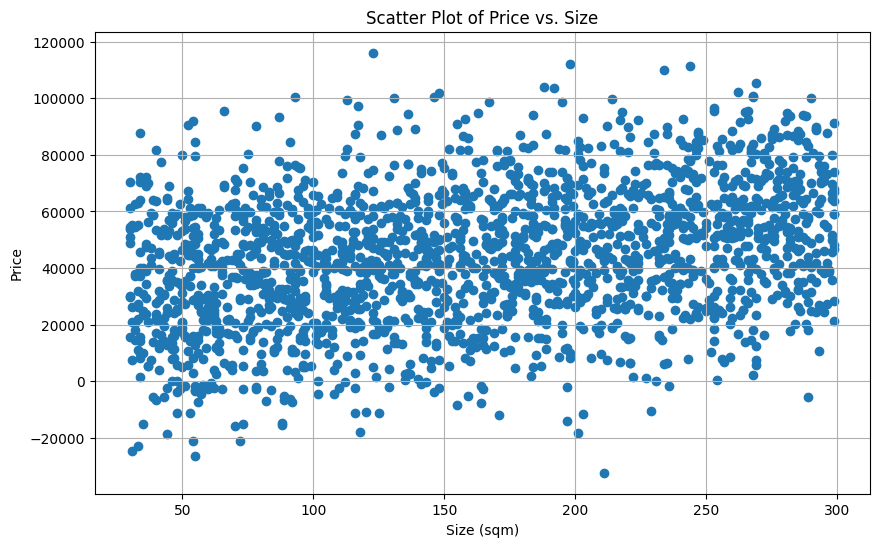

In [13]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df['size_sqm'], new_df['price'])
plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Size')
plt.grid(True)
plt.show()


In [14]:

# Calculate the mean of 'price' and 'size_sqm'
mean_Y = new_df['price'].mean()
mean_X = new_df['size_sqm'].mean()

print(f"Mean Price: {mean_Y}")
print(f"Mean Size (sqm): {mean_X}")


Mean Price: 43993.58089403084
Mean Size (sqm): 161.831013916501


Mean Price: 43993.58089403084
Mean Size (sqm): 161.831013916501


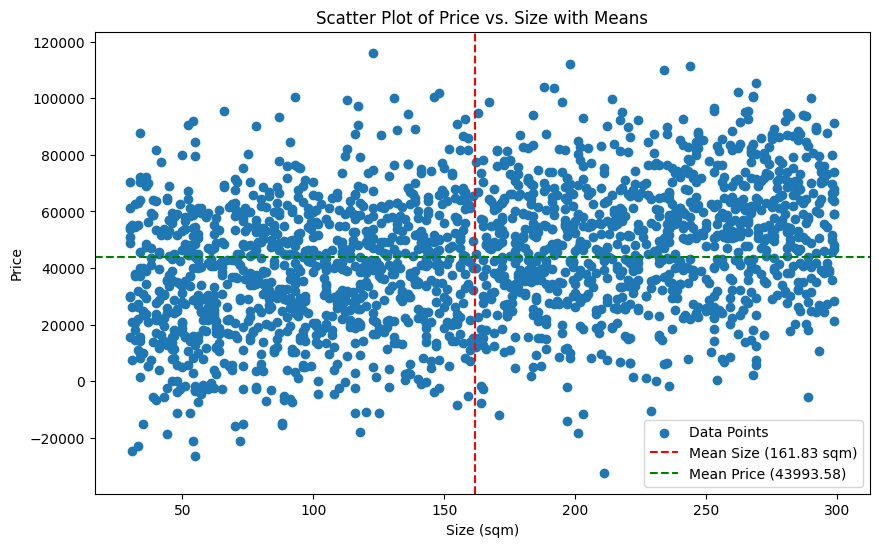

In [15]:
# Calculate the mean of 'price' and 'size_sqm'
mean_price = new_df['price'].mean()
mean_size_sqm = new_df['size_sqm'].mean()

print(f"Mean Price: {mean_Y}")
print(f"Mean Size (sqm): {mean_X}")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df['size_sqm'], new_df['price'], label='Data Points')

# Add a vertical line for the mean size
plt.axvline(x=mean_size_sqm, color='red', linestyle='--', label=f'Mean Size ({mean_X:.2f} sqm)')

# Add a horizontal line for the mean price
plt.axhline(y=mean_price, color='green', linestyle='--', label=f'Mean Price ({mean_Y:.2f})')


plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Size with Means')
plt.legend() # Show the legend
plt.show()


In [16]:
new_df["X-mean"] = new_df["size_sqm"] - new_df["size_sqm"].mean()
new_df["Y-mean"] = new_df["price"] - new_df["price"].mean()
new_df["X-mean^2"] = new_df["X-mean"] ** 2
new_df["Y-mean^2"] = new_df["Y-mean"] ** 2
new_df

<ipython-input-16-c519b9111e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["X-mean"] = new_df["size_sqm"] - new_df["size_sqm"].mean()
<ipython-input-16-c519b9111e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Y-mean"] = new_df["price"] - new_df["price"].mean()
<ipython-input-16-c519b9111e2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,price,size_sqm,X-mean,Y-mean,X-mean^2,Y-mean^2
0,30962.533609,111.0,-50.831014,-13031.047285,2583.791976,1.698082e+08
9,10815.557454,33.0,-128.831014,-33178.023440,16597.430147,1.100781e+09
12,14588.215982,95.0,-66.831014,-29405.364912,4466.384421,8.646755e+08
27,29759.129596,NaN,NaN,-14234.451298,NaN,2.026196e+08
31,15858.798062,143.0,-18.831014,-28134.782832,354.607085,7.915660e+08
...,...,...,...,...,...,...
9982,48212.029961,NaN,NaN,4218.449067,NaN,1.779531e+07
9983,86785.184183,157.0,-4.831014,42791.603289,23.338695,1.831121e+09
9988,21231.467534,154.0,-7.831014,-22762.113360,61.324779,5.181138e+08
9997,57082.726790,172.0,10.168986,13089.145896,103.408278,1.713257e+08


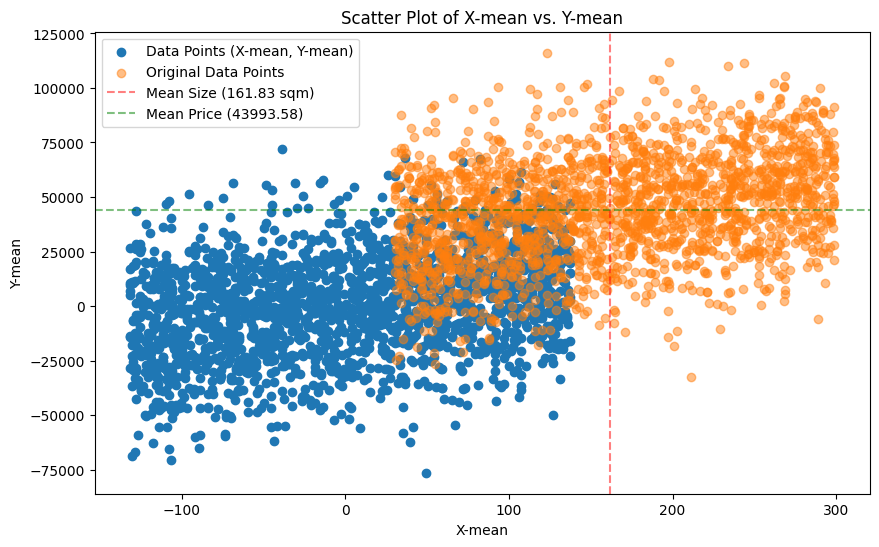

In [17]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df['X-mean'], new_df['Y-mean'], label='Data Points (X-mean, Y-mean)')


plt.xlabel('X-mean')
plt.ylabel('Y-mean')
plt.title('Scatter Plot of X-mean vs. Y-mean')
# plt.grid(True)
plt.legend() # Show the legend


# Add the previous plot elements for comparison
plt.scatter(new_df['size_sqm'], new_df['price'], label='Original Data Points', alpha=0.5)  # alpha for transparency
plt.axvline(x=mean_size_sqm, color='red', linestyle='--', label=f'Mean Size ({mean_size_sqm:.2f} sqm)', alpha=0.5)
plt.axhline(y=mean_price, color='green', linestyle='--', label=f'Mean Price ({mean_price:.2f})', alpha=0.5)

plt.legend() # Show the legend

plt.show()


In [18]:
new_df["X-mean* Y-mean"] = new_df["X-mean"] * new_df["Y-mean"]
new_df.head()

<ipython-input-18-a8cd11691297>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["X-mean* Y-mean"] = new_df["X-mean"] * new_df["Y-mean"]


,price,size_sqm,X-mean,Y-mean,X-mean^2,Y-mean^2,X-mean* Y-mean
0,30962.533609,111.0,-50.831014,-13031.047285,2583.791976,1.698082e+08,6.623813e+05
9,10815.557454,33.0,-128.831014,-33178.023440,16597.430147,1.100781e+09,4.274358e+06
12,14588.215982,95.0,-66.831014,-29405.364912,4466.384421,8.646755e+08,1.965190e+06
27,29759.129596,NaN,NaN,-14234.451298,NaN,2.026196e+08,NaN
31,15858.798062,143.0,-18.831014,-28134.782832,354.607085,7.915660e+08,5.298065e+05


In [19]:
new_df.head()

,price,size_sqm,X-mean,Y-mean,X-mean^2,Y-mean^2,X-mean* Y-mean
0,30962.533609,111.0,-50.831014,-13031.047285,2583.791976,1.698082e+08,6.623813e+05
9,10815.557454,33.0,-128.831014,-33178.023440,16597.430147,1.100781e+09,4.274358e+06
12,14588.215982,95.0,-66.831014,-29405.364912,4466.384421,8.646755e+08,1.965190e+06
27,29759.129596,NaN,NaN,-14234.451298,NaN,2.026196e+08,NaN
31,15858.798062,143.0,-18.831014,-28134.782832,354.607085,7.915660e+08,5.298065e+05


In [26]:
# Calculate the covariance
covariance = new_df["X-mean* Y-mean"].sum() / (len(new_df) - 1)

print(f"Covariance: {covariance}")


Covariance: 531880.2934463818


In [27]:
# Calculate the standard deviation of 'price' (Y)
std_dev_Y = new_df['price'].std()

# Calculate the standard deviation of 'size_sqm' (X)
std_dev_X = new_df['size_sqm'].std()

print(f"Standard Deviation of Price (Y): {std_dev_Y}")
print(f"Standard Deviation of Size (sqm) (X): {std_dev_X}")


Standard Deviation of Price (Y): 23720.094144067607
Standard Deviation of Size (sqm) (X): 78.00340601500122


In [29]:
corr_XY = covariance / (std_dev_Y * std_dev_X)
print(f"Correlation Coefficient: {corr_XY}")

Correlation Coefficient: 0.28746430470886486
